In [1]:
# Homework 4 / Sofie Ghysels / Statistical and Machine Learning approaches for marketing 

In [2]:
# Exercise 3 (p.332, Chap.8)

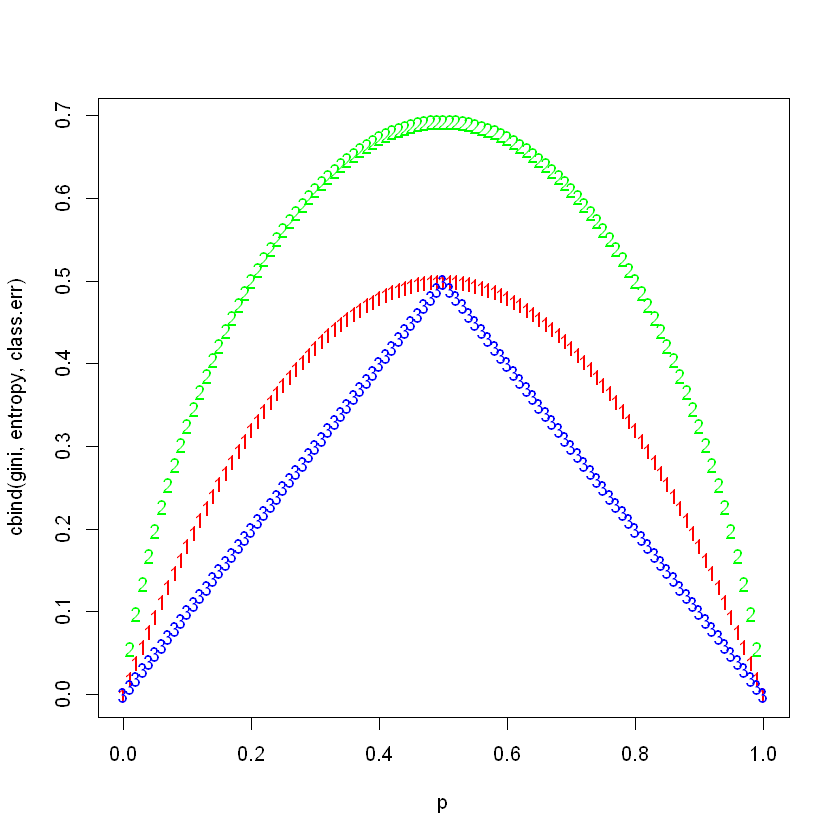

In [3]:
p = seq(0, 1, 0.01)
gini = p * (1 - p) * 2
entropy = -(p * log(p) + (1 - p) * log(1 - p))
class.err = 1 - pmax(p, 1 - p)
matplot(p, cbind(gini, entropy, class.err), col = c("red", "green", "blue"))

In [4]:
# Exercise 5 (p.332, Chap.8)

In [5]:
p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
p

[1] 0.10 0.15 0.20 0.20 0.55 0.60 0.60 0.65 0.70 0.75

In [6]:
# majority 
sum(p >= 0.5) > sum(p < 0.5)
# there are more red predictions than green predictions 

[1] TRUE

In [7]:
# mean 
mean(p)
# more probability of green 

[1] 0.45

In [8]:
# Exercise 8 (p.333, Chap.8)

In [9]:
# A - splitting data into test and train 

In [10]:
library(ISLR)
attach(Carseats)
set.seed(1)

In [11]:
set.seed(123)
train <- sample(1:nrow(Carseats), 200)
carseats.train <- Carseats[train, ]
carseats.test <- Carseats[-train, ]

In [12]:
head(carseats.train)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
179,10.66,104,71,14,89,81,Medium,25,14,No,Yes
14,10.96,115,28,11,29,86,Good,53,18,Yes,Yes
195,7.23,112,98,18,481,128,Medium,45,11,Yes,Yes
306,8.03,115,29,26,394,132,Medium,33,13,Yes,Yes
118,8.80,145,53,0,507,119,Medium,41,12,Yes,No
299,10.98,148,63,0,312,130,Good,63,15,Yes,No


In [13]:
head(carseats.test)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
12,11.96,117,94,4,503,94,Good,50,13,Yes,Yes


In [14]:
# B - Fit regression tree to training set

In [15]:
library(tree)
tree.carseats = tree(Sales ~ ., data = carseats.train)
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "Age"         "Population" 
[6] "Education"   "CompPrice"   "Advertising"
Number of terminal nodes:  18 
Residual mean deviance:  2.132 = 388.1 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.08000 -0.92870  0.06244  0.00000  0.87020  3.71700 

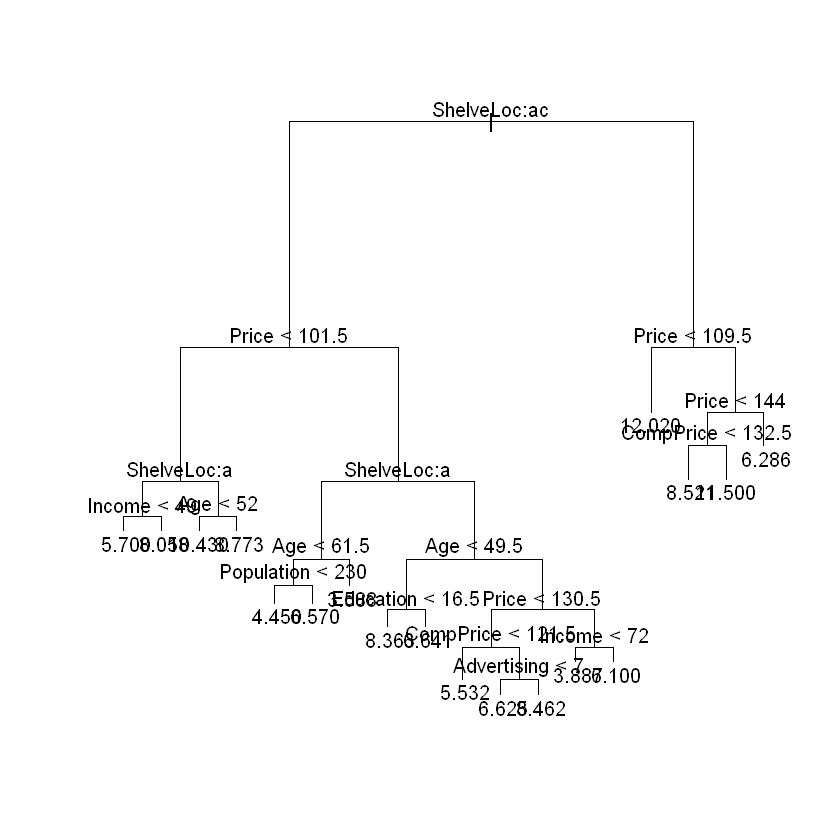

In [16]:
plot(tree.carseats)
text(tree.carseats)

In [24]:
pred.carseats = predict(tree.carseats, carseats.test)
mean((carseats.test$Sales - pred.carseats)^2)

[1] 4.395357

In [ ]:
# C - Cross validation

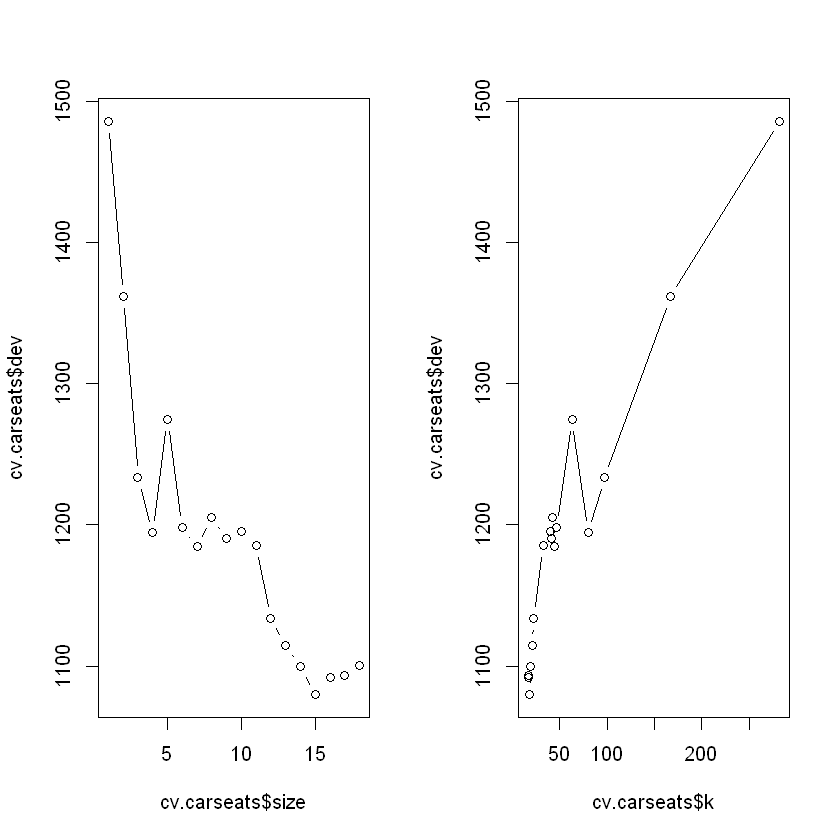

In [25]:
cv.carseats = cv.tree(tree.carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type = "b")
plot(cv.carseats$k, cv.carseats$dev, type = "b")

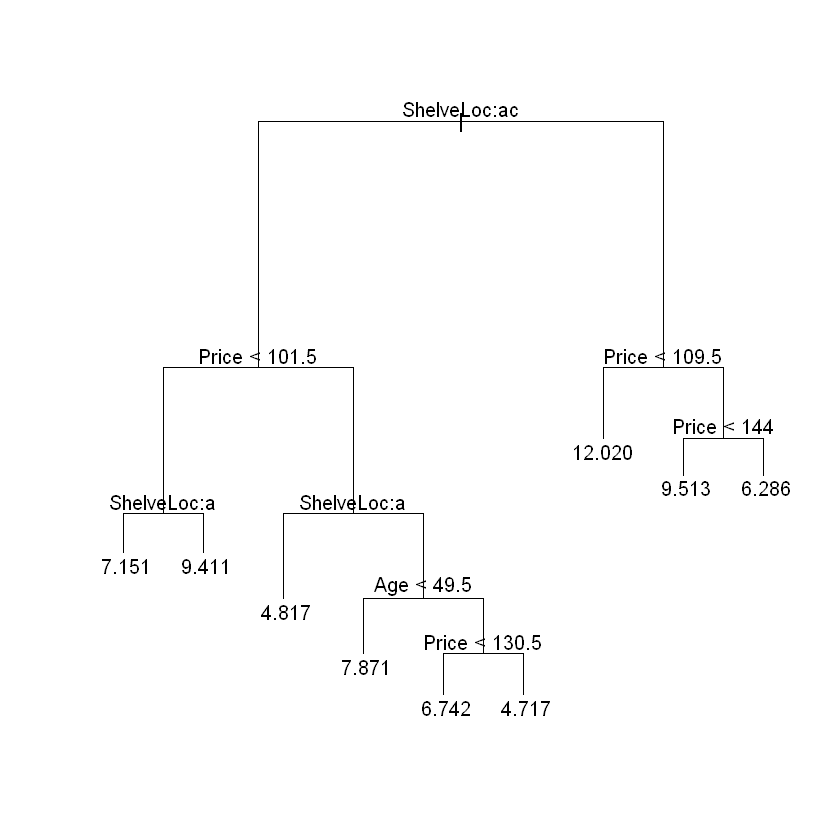

In [26]:
pruned.carseats = prune.tree(tree.carseats, best = 9)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats)

In [28]:
pred.pruned = predict(pruned.carseats, carseats.test)
mean((carseats.test$Sales - pred.pruned)^2)

[1] 4.534502

In [ ]:
# D - Bagging

In [29]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [31]:
bag.carseats = randomForest(Sales ~ ., data = carseats.train, mtry = 10, ntree = 500, 
    importance = T)
bag.pred = predict(bag.carseats, carseats.test)
mean((carseats.test$Sales - bag.pred)^2)

[1] 2.689996

In [32]:
importance(bag.carseats)
# Price, ShelveLoc and Age are three most important predictors

,%IncMSE,IncNodePurity
CompPrice,19.74043204,164.872571
Income,6.07429322,86.836945
Advertising,6.08829792,79.903603
Population,-1.32984513,54.133346
Price,44.42919719,379.645564
ShelveLoc,47.17176976,375.789048
Age,15.95243833,177.604705
Education,2.36593202,59.128238
Urban,0.16258987,8.045304
US,0.01902933,5.224573


In [ ]:
# E - Random forests 

In [36]:
rf.carseats = randomForest(Sales ~ ., data = carseats.train, mtry = 5, ntree = 500, 
    importance = T)
rf.pred = predict(rf.carseats, carseats.test)
mean((carseats.test$Sales - rf.pred)^2)

[1] 3.03922

In [37]:
importance(rf.carseats)
# Price , ShelveLoc and Age are three most important predictors 

,%IncMSE,IncNodePurity
CompPrice,14.7898295,149.306703
Income,7.3671384,104.029478
Advertising,7.1711267,90.961911
Population,0.5338106,80.109538
Price,36.2512459,328.796774
ShelveLoc,37.4954268,326.234797
Age,17.2920678,206.144652
Education,1.8089497,64.237698
Urban,0.7107411,10.892372
US,0.4041394,9.603097


In [ ]:
# Exercise 9 (p.334, Chap.8)

In [ ]:
# A - create training and test set

In [38]:
set.seed(112)
train <- sample(1:nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]
str(OJ.train)
str(OJ.test)

'data.frame':	800 obs. of  18 variables:
 $ Purchase      : Factor w/ 2 levels "CH","MM": 1 1 2 2 1 1 1 2 1 1 ...
 $ WeekofPurchase: num  249 272 275 276 278 267 260 243 267 276 ...
 $ StoreID       : num  2 4 1 7 3 7 7 1 7 2 ...
 $ PriceCH       : num  1.89 1.99 1.96 1.99 2.09 1.86 1.86 1.86 1.86 1.99 ...
 $ PriceMM       : num  2.09 2.09 2.13 2.13 2.09 2.13 2.13 1.99 2.13 2.18 ...
 $ DiscCH        : num  0 0 0 0 0.2 0 0 0 0 0 ...
 $ DiscMM        : num  0 0.4 0.74 0.54 0 0 0.24 0.8 0 0 ...
 $ SpecialCH     : num  0 0 0 0 0 1 0 0 1 0 ...
 $ SpecialMM     : num  0 0 1 1 0 0 0 1 0 1 ...
 $ LoyalCH       : num  0.917 0.952 0.477 0.589 0.986 ...
 $ SalePriceMM   : num  2.09 1.69 1.39 1.59 2.09 2.13 1.89 1.19 2.13 2.18 ...
 $ SalePriceCH   : num  1.89 1.99 1.96 1.99 1.89 1.86 1.86 1.86 1.86 1.99 ...
 $ PriceDiff     : num  0.2 -0.3 -0.57 -0.4 0.2 0.27 0.03 -0.67 0.27 0.19 ...
 $ Store7        : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 2 2 1 2 1 ...
 $ PctDiscMM     : num  0 0.191 0.347 0.2

In [ ]:
# B - fit tree to training data

In [39]:
library(tree)
oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)
# tree uses two variables: LoyalCH and PriceDiff / 7 terminal nodes / Training error rate is 0.155


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff" "DiscMM"   
Number of terminal nodes:  7 
Residual mean deviance:  0.7781 = 617 / 793 
Misclassification error rate: 0.1662 = 133 / 800 

In [ ]:
# C - type name of tree object

In [40]:
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1070.00 CH ( 0.61000 0.39000 )  
   2) LoyalCH < 0.450956 280  296.10 MM ( 0.22143 0.77857 )  
     4) LoyalCH < 0.276142 164  109.20 MM ( 0.10366 0.89634 ) *
     5) LoyalCH > 0.276142 116  154.90 MM ( 0.38793 0.61207 )  
      10) PriceDiff < 0.05 54   51.75 MM ( 0.18519 0.81481 ) *
      11) PriceDiff > 0.05 62   84.92 CH ( 0.56452 0.43548 ) *
   3) LoyalCH > 0.450956 520  491.50 CH ( 0.81923 0.18077 )  
     6) LoyalCH < 0.764572 255  318.80 CH ( 0.68235 0.31765 )  
      12) PriceDiff < 0.085 93  127.60 MM ( 0.44086 0.55914 )  
        24) DiscMM < 0.47 74  102.40 CH ( 0.52703 0.47297 ) *
        25) DiscMM > 0.47 19   12.79 MM ( 0.10526 0.89474 ) *
      13) PriceDiff > 0.085 162  152.20 CH ( 0.82099 0.17901 ) *
     7) LoyalCH > 0.764572 265  103.70 CH ( 0.95094 0.04906 ) *

In [ ]:
# D - create plot 

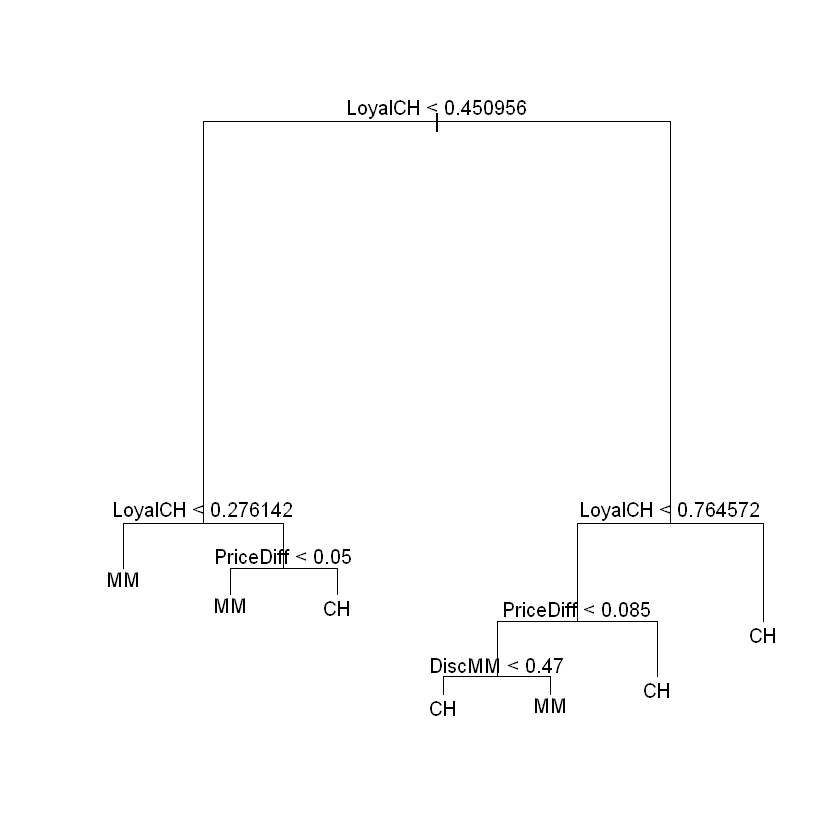

In [41]:
plot(oj.tree)
text(oj.tree)

In [ ]:
# E - predict response on test data and produce confusion matrix 

In [47]:
oj.pred = predict(oj.tree, OJ.test, type = "class")
test.tab<-table(OJ.test$Purchase, oj.pred, dnn = c("Actual","Predicted"))
test.tab

      Predicted
Actual  CH  MM
    CH 150  15
    MM  40  65

In [ ]:
# F - apply cv.tree function to training set

In [49]:
cv.oj = cv.tree(oj.tree,FUN=prune.tree)
cv.oj

$size
[1] 7 6 5 4 3 2 1

$dev
[1]  720.1585  693.4468  691.9336  737.7064  757.3542  835.8315 1071.2941

$k
[1]      -Inf  12.46495  18.26776  31.90515  38.92596  68.93196 282.45905

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [ ]:
# G - create plot 

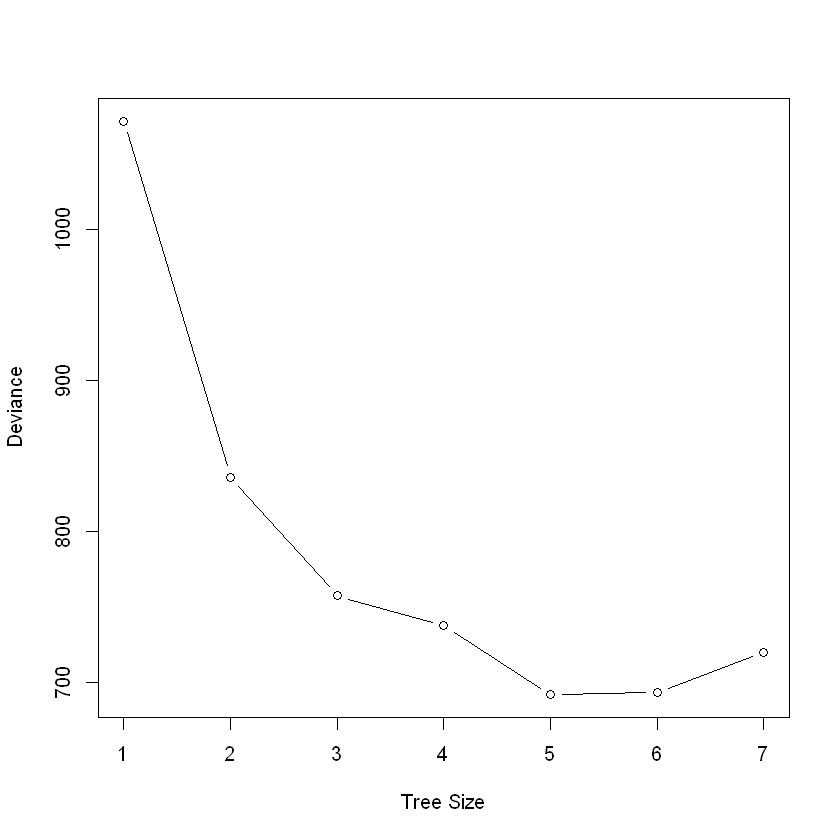

In [51]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

In [ ]:
# H - tree size 

In [ ]:
# 5 has the lowest cross-validation error

In [ ]:
# I - produce pruned tree

In [53]:
oj.pruned = prune.tree(oj.tree, best = 5)
oj.pruned

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1070.0 CH ( 0.61000 0.39000 )  
   2) LoyalCH < 0.450956 280  296.1 MM ( 0.22143 0.77857 )  
     4) LoyalCH < 0.276142 164  109.2 MM ( 0.10366 0.89634 ) *
     5) LoyalCH > 0.276142 116  154.9 MM ( 0.38793 0.61207 ) *
   3) LoyalCH > 0.450956 520  491.5 CH ( 0.81923 0.18077 )  
     6) LoyalCH < 0.764572 255  318.8 CH ( 0.68235 0.31765 )  
      12) PriceDiff < 0.085 93  127.6 MM ( 0.44086 0.55914 ) *
      13) PriceDiff > 0.085 162  152.2 CH ( 0.82099 0.17901 ) *
     7) LoyalCH > 0.764572 265  103.7 CH ( 0.95094 0.04906 ) *

In [ ]:
# J - compare training error rates

In [54]:
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = c(12L, 5L))
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.8148 = 647.8 / 795 
Misclassification error rate: 0.1812 = 145 / 800 

In [ ]:
# K - compare test error rates 
# unpruned has the highest error rate 

In [55]:
pred.unpruned = predict(oj.tree, OJ.test, type = "class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned/length(pred.unpruned)

[1] 0.2037037

In [56]:
pred.pruned = predict(oj.pruned, OJ.test, type = "class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned/length(pred.pruned)

[1] 0.1888889

In [ ]:
# Exercise 10 (p.334, Chap.8)

In [ ]:
# A 

In [58]:
library(ISLR)
sum(is.na(Hitters$Salary))

[1] 59

In [59]:
Hitters <- na.omit(Hitters)
Hitters$Salary <- log(Hitters$Salary)

In [ ]:
# B

In [60]:
train <- 1:200
Hitters.train <- Hitters[train, ]
Hitters.test <- Hitters[-train, ]

In [61]:
Hitters.train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,4.248495,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,4.605170,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,4.317488,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,7.003065,A


In [62]:
Hitters.test

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Reggie Jackson,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,A,W,0,0,0,6.189290,A
-Ron Kittle,376,82,21,42,60,35,5,1770,408,115,238,299,157,A,W,0,0,0,6.052089,A
-Ray Knight,486,145,11,51,76,40,11,3967,1102,67,410,497,284,N,E,88,204,16,6.214608,A
-Rick Leach,246,76,5,35,39,13,6,912,234,12,102,96,80,A,E,44,0,1,5.521461,A
-Rick Manning,205,52,8,31,27,17,12,5134,1323,56,643,445,459,A,E,155,3,2,5.991465,A
-Rance Mulliniks,348,90,11,50,45,43,10,2288,614,43,295,273,269,A,E,60,176,6,6.109248,A
-Ron Oester,523,135,8,52,44,52,9,3368,895,39,377,284,296,N,W,367,475,19,6.620073,N
-Rey Quinones,312,68,2,32,22,24,1,312,68,2,32,22,24,A,E,86,150,15,4.248495,A
-Rafael Ramirez,496,119,8,57,33,21,7,3358,882,36,365,280,165,N,W,155,371,29,6.774224,N


In [ ]:
# C

Warning message:
"package 'gbm' is in use and will not be installed"


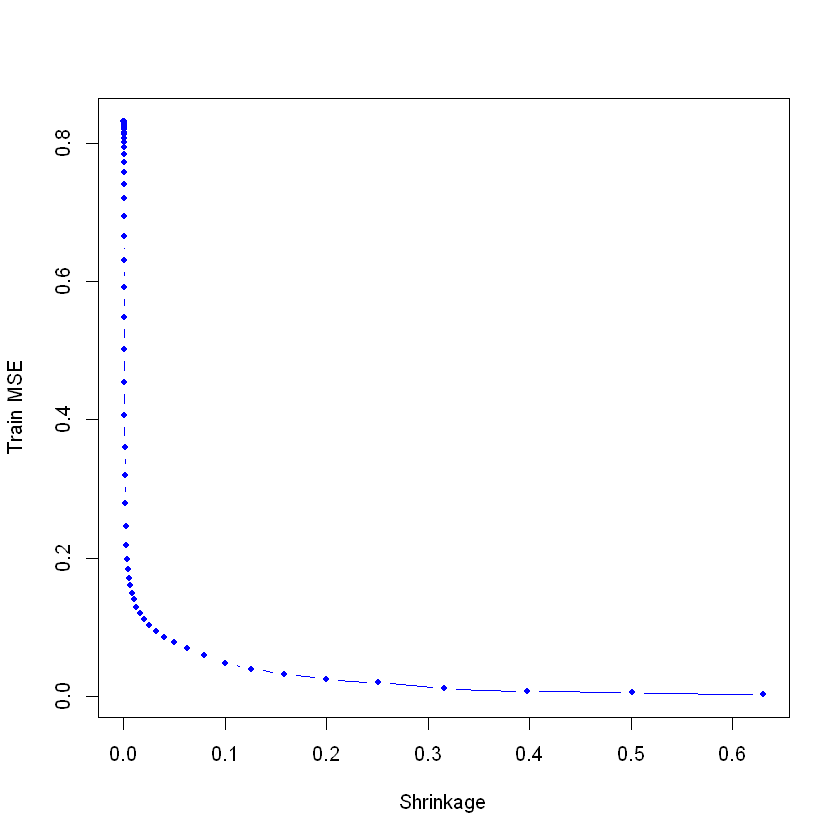

In [66]:
install.packages("gbm")
library(gbm)
set.seed(103)
pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows
length.lambdas = length(lambdas)
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)
for (i in 1:length.lambdas) {
    boost.hitters = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
        n.trees = 1000, shrinkage = lambdas[i])
    train.pred = predict(boost.hitters, Hitters.train, n.trees = 1000)
    test.pred = predict(boost.hitters, Hitters.test, n.trees = 1000)
    train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
    test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}

plot(lambdas, train.errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE", 
    col = "blue", pch = 20)

In [ ]:
# D

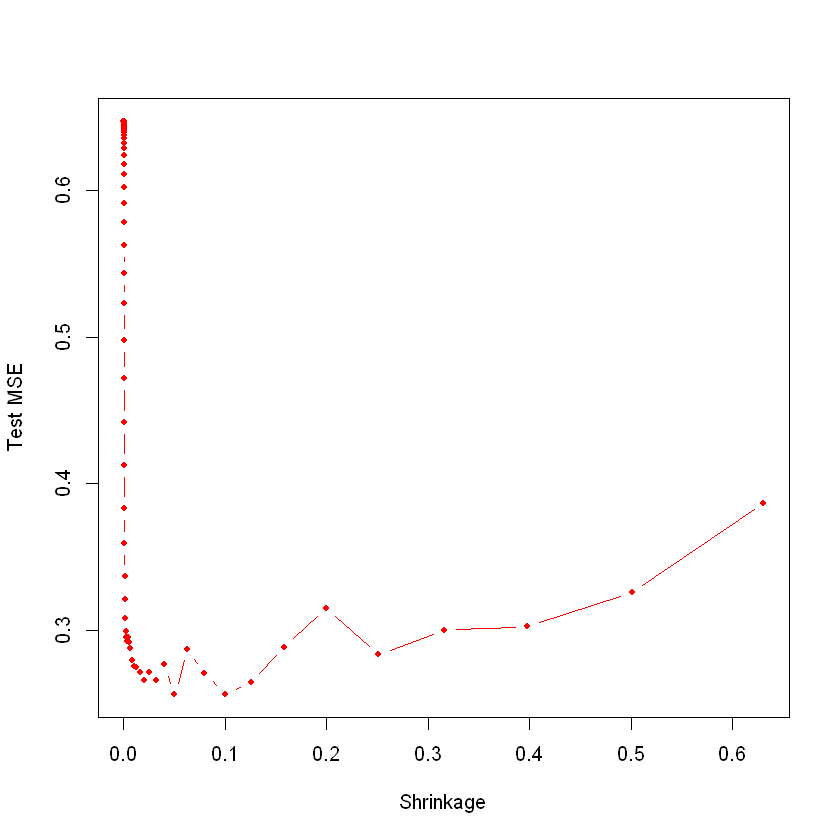

In [67]:
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage", ylab = "Test MSE", 
    col = "red", pch = 20)

In [ ]:
# E

In [68]:
lm.fit = lm(Salary ~ ., data = Hitters.train)
lm.pred = predict(lm.fit, Hitters.test)
mean((Hitters.test$Salary - lm.pred)^2)

[1] 0.4917959

In [ ]:
# F

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,22.4725600
CRBI,CRBI,9.4228158
CWalks,CWalks,8.0438716
PutOuts,PutOuts,7.2699327
CRuns,CRuns,6.9200701
Years,Years,6.8842314
Walks,Walks,6.5726615
CHits,CHits,4.3379630
CHmRun,CHmRun,4.0828590


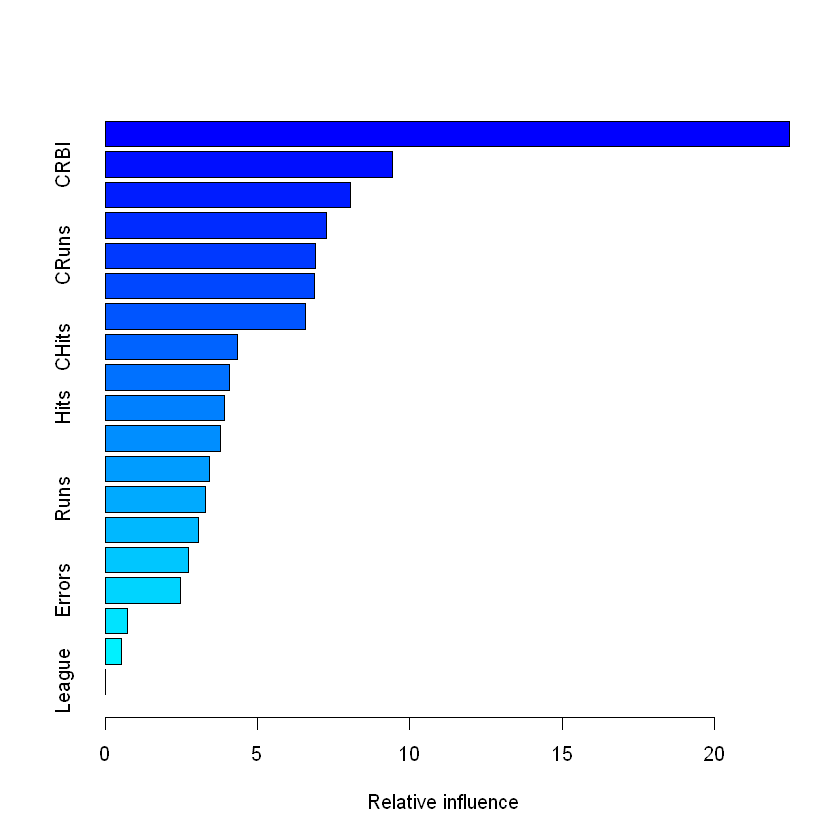

In [69]:
boost.best = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
    n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.best)
# CAtBat, CRBI and CWalks are the most imporant ones 

In [ ]:
# G

In [70]:
set.seed(21)
rf.hitters = randomForest(Salary ~ ., data = Hitters.train, ntree = 500, mtry = 19)
rf.pred = predict(rf.hitters, Hitters.test)
mean((Hitters.test$Salary - rf.pred)^2)

[1] 0.2303919